# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **Shift + Enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.

# Fundamental Data

In this notebook, you will learn to fetch fundamental data for stocks. You will fetch data such as balance sheet, cash flow and income statements from the `simfin` and the `yfinance` package. The [simfin](https://pypi.org/project/simfin/) package provides one year lagging fundamental data and the most recent one year data is obtained from the [yfinance](https://pypi.org/project/yfinance/) package. The fundamental data from the two sources can be merged to perform further analysis.

The notebook is divided into the following parts:

1. [Stock Fundamental Data](#data)
    1. [Income Statements](#income)
    1. [Balance Sheets](#balance)
    1. [Cash Flow Statement](#cash)
1. [Utility to Fetch Fundamental Data](#func)
1. [Plot the Data](#plot)

## Import Libraries

In [1]:
# Import the SimFin library
import simfin as sf

# Import the names used for easy access to SimFin's data-columns
from simfin.names import *

# Import the yfinance library
import yfinance as yf

# Import time manipulation library
from datetime import timedelta

# Import data manipulation library
import pandas as pd

# Import matplotlib and set the style for plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

<a id='data'></a> 
## Stock Fundamental Data

The fundamental data for stocks is fetched from the `simfin` and the `yfinance` library. The `simfin` library currently provides data for stocks from the US and Germany. For this illustration, we will use the stocks in the the US market. The free dataset from [SimFin](https://simfin.com/data/bulk) will be used in this notebook.

<a id='data'></a> 
## Getting  the simfin API key

To get the free simfin API key, register your email id at https://simfin.com/. Confirm your email id by clicking on the link in the email shared by the simfin team. This will active the free API key. Login to the simfin account and go to https://simfin.com/data/api to access free API key.

The below code fetches the simfin API key of quantra using the get_simfin_api_key method of the FMDA_quantra module. However, while running the code on your local machine, you are requested to replace the API key placeholder text with the actual API key in the file FMDA_quantra.py. 

This file needs to be in the same folder as the current working directory, which is usually the folder where your notebook is being run from.

In [2]:
# Import libraries
import os
import sys
sys.path.append("..")

# Import the get_simfin_api_key from the FMDA_quantra module
# The code of this module can be found in the downloads (last section) of this course
# You need to edit FMDA_quantra.py file in the folder 'data_modules' and add your simfin API key manually before you continue
from data_modules.FMDA_quantra import get_simfin_api_key

# Method in FMDA_quantra module to get the simfin API key
simfin_api_key = get_simfin_api_key()



In [3]:
# SimFin data-directory
sf.set_data_dir('~/simfin_data/')

# SimFin API key
sf.config.set_api_key(api_key=simfin_api_key)

# Set the market as US
market = 'us'

# Define the stock ticker
stock_ticker = 'AAPL'

# Define the yfinance stock ticker
stock_yf_ticker = yf.Ticker(stock_ticker)

<a id='income'></a> 
## Income Statements

You will fetch the following data from the income statement:
1. Revenue
1. Operating Income
1. Pretax Income
1. Net Income

<a id='income_simfin'></a> 
### Quarterly Income Statements from SimFin

In [4]:
# Fetch quarterly income statements for all the tickers in SimFin database
income_data_simfin_all_stocks = sf.load_income(variant='quarterly', market=market)

# Get the quarterly income statement for the ticker
income_data_simfin = income_data_simfin_all_stocks.loc[stock_ticker,:]
income_data_simfin.tail()

Dataset "us-income-quarterly" on disk (3 days old).
- Loading from disk ... Done!


,SimFinId,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
Report Date,,,,,,,,,,,,,,,,,,,,,
2019-09-30,111052,USD,2019,Q4,2019-10-31,2021-10-29,1.796325e+10,1.808150e+10,6.404000e+10,-3.972700e+10,...,502000000.0,NaN,16127000000,NaN,16127000000,-2.441000e+09,13686000000,NaN,13686000000,13686000000
2019-12-31,111052,USD,2020,Q1,2020-01-29,2021-01-28,1.766016e+10,1.781842e+10,9.181900e+10,-5.660200e+10,...,349000000.0,NaN,25918000000,NaN,25918000000,-3.682000e+09,22236000000,NaN,22236000000,22236000000
2020-03-31,111052,USD,2020,Q2,2020-05-01,2021-04-29,1.744040e+10,1.761876e+10,5.831300e+10,-3.594300e+10,...,282000000.0,NaN,13135000000,NaN,13135000000,-1.886000e+09,11249000000,NaN,11249000000,11249000000
2020-06-30,111052,USD,2020,Q3,2020-07-31,2021-07-28,1.725029e+10,1.741915e+10,5.968500e+10,-3.700500e+10,...,46000000.0,NaN,13137000000,NaN,13137000000,-1.884000e+09,11253000000,NaN,11253000000,11253000000
2020-09-30,111052,USD,2020,Q4,2020-10-30,2021-07-28,1.705762e+10,1.725652e+10,6.469800e+10,-4.000900e+10,...,126000000.0,NaN,14901000000,NaN,14901000000,-2.228000e+09,12673000000,NaN,12673000000,12673000000


<a id='income_yfinance'></a> 
### Quarterly Income Statements from yfinance

In [5]:
# Get the quarterly income statement from yfinance
income_data_yfinance = stock_yf_ticker.quarterly_financials.T
income_data_yfinance

,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Net Income,Selling General Administrative,Gross Profit,Ebit,Operating Income,Other Operating Expenses,...,Non Recurring,Other Items,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares
,,,,,,,,,,,,,,,,,,,,,
2021-09-25,5772000000.0,None,23248000000.0,None,20551000000.0,5616000000.0,35174000000.0,23786000000.0,23786000000.0,None,...,None,None,2697000000.0,83360000000.0,59574000000.0,48186000000.0,-538000000.0,None,20551000000.0,20551000000.0
2021-06-26,5717000000.0,None,24369000000.0,None,21744000000.0,5412000000.0,35255000000.0,24126000000.0,24126000000.0,None,...,None,None,2625000000.0,81434000000.0,57308000000.0,46179000000.0,243000000.0,None,21744000000.0,21744000000.0
2021-03-27,5262000000.0,None,28011000000.0,None,23630000000.0,5314000000.0,38079000000.0,27503000000.0,27503000000.0,None,...,None,None,4381000000.0,89584000000.0,62081000000.0,51505000000.0,508000000.0,None,23630000000.0,23630000000.0
2020-12-26,5163000000.0,None,33579000000.0,None,28755000000.0,5631000000.0,44328000000.0,33534000000.0,33534000000.0,None,...,None,None,4824000000.0,111439000000.0,77905000000.0,67111000000.0,45000000.0,None,28755000000.0,28755000000.0


<a id='income_combined'></a> 
### Combined Income Statement

The two DataFrames containing the income statements are combined by renaming the columns in `income_data_yfinance` to match the column names in `income_data_simfin`.

In [6]:
"""
The mapping dictionary stores the column names from yfinance as key and
the corresponding column name from Simfin as the value
"""
income_data_mapping_dict =\
    {
        "Total Revenue" : "Revenue",
        "Operating Income" : "Operating Income (Loss)",
        "Income Before Tax" : "Pretax Income (Loss)",
        "Net Income" : "Net Income"
    }

# Rename the columns in the income_data_yfinance DataFrame
income_data_yfinance = \
    income_data_yfinance.rename(columns=income_data_mapping_dict)

# The final column list for the merged DataFrame
income_data_column_heads = [i[1] for i in income_data_mapping_dict.items()]

# Trim the income_data_simfin to the final column list
income_data_simfin = income_data_simfin[income_data_column_heads]

# Trim the income_data_yfinance to the final column list
income_data_yfinance = income_data_yfinance[income_data_column_heads]

# Sort the income_data_yfinance to match the order as in the SimFin DataFrame
income_data_yfinance = income_data_yfinance.sort_index(ascending=True)

# Join the two DataFrames
income_data = income_data_simfin.append(income_data_yfinance)

# Preview the stock's income data
income_data.tail()

,Revenue,Operating Income (Loss),Pretax Income (Loss),Net Income
2020-09-30,64698000000.0,14775000000,14901000000,12673000000
2020-12-26,111439000000.0,33534000000.0,33579000000.0,28755000000.0
2021-03-27,89584000000.0,27503000000.0,28011000000.0,23630000000.0
2021-06-26,81434000000.0,24126000000.0,24369000000.0,21744000000.0
2021-09-25,83360000000.0,23786000000.0,23248000000.0,20551000000.0


<a id='balance'></a> 
## Balance Sheets

You will fetch the following data from the balance sheet:
1. Total Assets
1. Total Equity
1. Retained Earnings
1. Long Term Debt

<a id='balance_simfin'></a> 
### Quarterly Balance Sheets from SimFin

In [7]:
# Fetch quarterly balance sheets for all the tickers in SimFin database
balance_sheet_simfin_all_stocks = sf.load_balance(variant='quarterly', market=market)

# Get the quarterly balance sheets for the ticker
balance_sheet_simfin = balance_sheet_simfin_all_stocks.loc[stock_ticker,:]
balance_sheet_simfin.tail()

Dataset "us-balance-quarterly" on disk (2 days old).
- Loading from disk ... Done!


,SimFinId,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,...,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity
Report Date,,,,,,,,,,,,,,,,,,,,,
2019-09-30,111052,USD,2019,Q4,2019-10-31,2020-10-30,1.796325e+10,1.808150e+10,1.005570e+11,2.292600e+10,...,1.624000e+10,1.057180e+11,9.180700e+10,1.423100e+11,248028000000,4.517400e+10,NaN,4.589800e+10,90488000000,338516000000
2019-12-31,111052,USD,2020,Q1,2020-01-29,2020-01-29,1.766016e+10,1.781842e+10,1.071620e+11,2.097000e+10,...,1.521400e+10,1.021610e+11,9.307800e+10,1.489260e+11,251087000000,4.597200e+10,NaN,4.397700e+10,89531000000,340618000000
2020-03-31,111052,USD,2020,Q2,2020-05-01,2020-05-01,1.744040e+10,1.761876e+10,9.405100e+10,1.572200e+10,...,2.042100e+10,9.609400e+10,8.908600e+10,1.458810e+11,241975000000,4.803200e+10,NaN,3.318200e+10,78425000000,320400000000
2020-06-30,111052,USD,2020,Q3,2020-07-31,2020-07-31,1.725029e+10,1.741915e+10,9.302500e+10,1.788200e+10,...,1.867500e+10,9.531800e+10,9.404800e+10,1.497440e+11,245062000000,4.869600e+10,NaN,2.413600e+10,72282000000,317344000000
2020-09-30,111052,USD,2020,Q4,2020-10-30,2021-10-29,1.705762e+10,1.725652e+10,9.094300e+10,1.612000e+10,...,1.376900e+10,1.053920e+11,9.866700e+10,1.531570e+11,258549000000,5.077900e+10,NaN,1.496600e+10,65339000000,323888000000


<a id='balance_yfinance'></a> 
### Quarterly Balance Sheets from yfinance

In [8]:
# Get the quarterly balance sheets from yfinance
balance_sheet_yfinance = stock_yf_ticker.quarterly_balance_sheet.T
balance_sheet_yfinance

,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,Other Liab,Treasury Stock,Other Assets,...,Other Stockholder Equity,Property Plant Equipment,Total Current Assets,Long Term Investments,Net Tangible Assets,Short Term Investments,Net Receivables,Long Term Debt,Inventory,Accounts Payable
,,,,,,,,,,,,,,,,,,,,,
2021-09-25,2.879120e+11,6.309000e+10,5.357700e+10,3.510020e+11,5.736500e+10,1.411100e+10,5.562000e+09,4.305000e+10,163000000.0,3.876200e+10,...,163000000.0,4.952700e+10,1.348360e+11,1.278770e+11,6.309000e+10,2.769900e+10,5.150600e+10,1.091060e+11,6.580000e+09,5.476300e+10
2021-06-26,2.655600e+11,6.428000e+10,5.130600e+10,3.298400e+11,5.498900e+10,1.364100e+10,9.233000e+09,3.835400e+10,58000000.0,4.485400e+10,...,58000000.0,3.861500e+10,1.144230e+11,1.319480e+11,6.428000e+10,2.764600e+10,3.390800e+10,1.057520e+11,5.178000e+09,4.040900e+10
2021-03-27,2.679800e+11,6.917800e+10,5.325500e+10,3.371580e+11,5.420300e+10,1.337600e+10,1.526100e+10,3.985300e+10,-286000000.0,4.333900e+10,...,-286000000.0,3.781500e+10,1.214650e+11,1.345390e+11,6.917800e+10,3.136800e+10,3.303600e+10,1.086420e+11,5.219000e+09,4.012700e+10
2020-12-26,2.878300e+11,6.622400e+10,5.589900e+10,3.540540e+11,5.174400e+10,1.368700e+10,1.430100e+10,4.304200e+10,179000000.0,4.327000e+10,...,179000000.0,3.793300e+10,1.541060e+11,1.187450e+11,6.622400e+10,4.081600e+10,5.862000e+10,9.928100e+10,4.973000e+09,6.384600e+10


<a id='balance_combined'></a> 
### Combined Balance Sheet

The two DataFrames containing the balance sheets are combined by renaming the columns in `balance_sheet_yfinance` to match the column names in `balance_sheet_simfin`.

In [9]:
"""
The mapping dictionary stores the column names from yfinance as key and
the corresponding column name from Simfin as the value
"""
balance_sheet_mapping_dict =\
    {
        "Total Assets" : "Total Assets",
        "Total Liab" : "Total Liabilities",
        "Total Current Assets" : "Total Current Assets",
        "Total Current Liabilities" : "Total Current Liabilities",
        "Total Stockholder Equity" : "Total Equity",
        "Retained Earnings" : "Retained Earnings",
        "Long Term Debt" : "Long Term Debt"
    }

# Rename the columns in the balance_sheet_yfinance DataFrame
balance_sheet_yfinance = \
    balance_sheet_yfinance.rename(columns=balance_sheet_mapping_dict)

# The final column list for the merged DataFrame
balance_sheet_column_heads = [i[1] for i in balance_sheet_mapping_dict.items()]

# Trim the balance_sheet_simfin to the final column list
balance_sheet_simfin = balance_sheet_simfin[balance_sheet_column_heads]

# Trim the balance_sheet_yfinance to the final column list
balance_sheet_yfinance = balance_sheet_yfinance[balance_sheet_column_heads]

# Sort the balance_sheet_yfinance to match the order as in the SimFin DataFrame
balance_sheet_yfinance = balance_sheet_yfinance.sort_index(ascending=True)

# Join the two DataFrames
balance_sheet_data = balance_sheet_simfin.append(balance_sheet_yfinance)

# Preview the asset's balance sheet data
balance_sheet_data.tail()

,Total Assets,Total Liabilities,Total Current Assets,Total Current Liabilities,Total Equity,Retained Earnings,Long Term Debt
2020-09-30,3.238880e+11,2.585490e+11,1.437130e+11,1.053920e+11,6.533900e+10,1.496600e+10,9.866700e+10
2020-12-26,3.540540e+11,2.878300e+11,1.541060e+11,1.325070e+11,6.622400e+10,1.430100e+10,9.928100e+10
2021-03-27,3.371580e+11,2.679800e+11,1.214650e+11,1.063850e+11,6.917800e+10,1.526100e+10,1.086420e+11
2021-06-26,3.298400e+11,2.655600e+11,1.144230e+11,1.077540e+11,6.428000e+10,9.233000e+09,1.057520e+11
2021-09-25,3.510020e+11,2.879120e+11,1.348360e+11,1.254810e+11,6.309000e+10,5.562000e+09,1.091060e+11


<a id='cash'></a> 
## Cashflow Statements

You will fetch the following data from the cashflow statement:
1. Net Cash from Operating Activities
1. Net Cash from Investing Activities
1. Net Cash from Financing Activities

<a id='cash_simfin'></a> 
### Quarterly Cashflow Statements from SimFin

In [10]:
# Fetch quarterly cash flow statements for all the tickers in SimFin database
cash_flow_simfin_all_stocks = sf.load_cashflow(variant='quarterly', market=market)

# Get the quarterly cash flow statements for the ticker
cash_flow_simfin = cash_flow_simfin_all_stocks.loc[stock_ticker,:]
cash_flow_simfin.tail()

Dataset "us-cashflow-quarterly" on disk (2 days old).
- Loading from disk ... Done!


,SimFinId,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Net Income/Starting Line,Depreciation & Amortization,...,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash
Report Date,,,,,,,,,,,,,,,,,,,,,
2019-09-30,111052,USD,2019,Q4,2019-10-31,2021-10-29,1.796325e+10,1.808150e+10,1.368600e+10,3.179000e+09,...,19910000000,-2.777000e+09,2.802000e+09,-13000000.0,-7.980000e+08,-3.479000e+09,-2.930000e+08,-1.705400e+10,-2.103900e+10,-1927000000
2019-12-31,111052,USD,2020,Q1,2020-01-29,2021-01-28,1.766016e+10,1.781842e+10,2.223600e+10,2.816000e+09,...,30516000000,-2.107000e+09,-1.039600e+10,-958000000.0,-1.366800e+10,-3.539000e+09,2.310000e+08,-2.070400e+10,-2.540700e+10,-8559000000
2020-03-31,111052,USD,2020,Q2,2020-05-01,2021-04-29,1.744040e+10,1.761876e+10,1.124900e+10,2.786000e+09,...,13311000000,-1.853000e+09,1.140700e+10,-176000000.0,9.013000e+09,-3.375000e+09,-1.753000e+09,-1.814600e+10,-2.094000e+10,1384000000
2020-06-30,111052,USD,2020,Q3,2020-07-31,2021-07-28,1.725029e+10,1.741915e+10,1.125300e+10,2.752000e+09,...,16271000000,-1.565000e+09,-2.992000e+09,-339000000.0,-5.165000e+09,-3.656000e+09,-4.410000e+08,-1.589100e+10,-1.911600e+10,-8010000000
2020-09-30,111052,USD,2020,Q4,2020-10-30,2021-07-28,1.705762e+10,1.725652e+10,1.267300e+10,2.702000e+09,...,20576000000,-1.784000e+09,7.316000e+09,-51000000.0,5.531000e+09,-3.511000e+09,4.462000e+09,-1.673700e+10,-2.135700e+10,4750000000


<a id='cash_simfin'></a> 
### Quarterly Cashflow Statements from yfinance

In [11]:
# Get the quarterly cash flow statements from yfinance
cash_flow_yfinance = stock_yf_ticker.quarterly_cashflow.T
cash_flow_yfinance

,Investments,Change To Liabilities,Total Cashflows From Investing Activities,Net Borrowings,Total Cash From Financing Activities,Change To Operating Activities,Issuance Of Stock,Net Income,Change In Cash,Repurchase Of Stock,Total Cash From Operating Activities,Depreciation,Other Cashflows From Investing Activities,Dividends Paid,Change To Inventory,Change To Account Receivables,Other Cashflows From Financing Activities,Change To Netincome,Capital Expenditures
,,,,,,,,,,,,,,,,,,,
2021-09-25,4.608000e+09,1.405000e+10,8.350000e+08,3.220000e+09,-2.038200e+10,-5.602000e+09,544000000.0,2.055100e+10,6.530000e+08,-2.044900e+10,2.020000e+10,2.989000e+09,-530000000.0,-3.640000e+09,-1.429000e+09,-8.809000e+09,-57000000.0,-1.550000e+09,-3.223000e+09
2021-06-26,5.747000e+09,3.070000e+08,3.572000e+09,3.220000e+09,-2.939600e+10,-6.048000e+09,544000000.0,2.174400e+10,-4.730000e+09,-2.559500e+10,2.109400e+10,2.832000e+09,-78000000.0,-3.767000e+09,1.300000e+07,1.031000e+09,-34000000.0,1.215000e+09,-2.093000e+09
2021-03-27,-7.895000e+09,-2.336600e+10,-1.036800e+10,1.042300e+10,-1.132600e+10,1.126500e+10,561000000.0,2.363000e+10,2.287000e+09,-1.884700e+10,2.398100e+10,2.797000e+09,-204000000.0,-3.447000e+09,-2.760000e+08,8.598000e+09,-16000000.0,1.333000e+09,-2.269000e+09
2020-12-26,-5.279000e+09,2.301100e+10,-8.584000e+09,-9.780000e+08,-3.224900e+10,-5.761000e+09,561000000.0,2.875500e+10,-2.070000e+09,-2.763600e+10,3.876300e+10,2.666000e+09,204000000.0,-3.613000e+09,-9.500000e+08,-1.094500e+10,-22000000.0,1.987000e+09,-3.500000e+09


<a id='cash_combined'></a> 
### Combined Cashflow Statement

The two DataFrames containing the cashflow statements are combined by renaming the columns in `cash_flow_yfinance` to match the column names in `cash_flow_simfin`.

In [12]:
"""
The mapping dictionary stores the column names from yfinance as key and
the corresponding column name from Simfin as the value
"""
cash_flow_mapping_dict =\
    {
        "Total Cash From Operating Activities" : "Net Cash from Operating Activities",
        "Total Cashflows From Investing Activities" : "Net Cash from Investing Activities",
        "Total Cash From Financing Activities" : "Net Cash from Financing Activities"
    }

# Rename the columns in the cash_flow_yfinance DataFrame
cash_flow_yfinance = \
    cash_flow_yfinance.rename(columns=cash_flow_mapping_dict)

# The final column list for the merged DataFrame
cash_flow_column_heads = [i[1] for i in cash_flow_mapping_dict.items()]

# Trim the cash_flow_simfin to the final column list
cash_flow_simfin = cash_flow_simfin[cash_flow_column_heads]

# Trim the cash_flow_yfinance to the final column list
cash_flow_yfinance = cash_flow_yfinance[cash_flow_column_heads]

# Sort the cash_flow_yfinance to match the order as in the SimFin DataFrame
cash_flow_yfinance = cash_flow_yfinance.sort_index(ascending=True)

# Join the two DataFrames
cash_flow_data = cash_flow_simfin.append(cash_flow_yfinance)

# Preview the asset's cashflow statement
cash_flow_data.tail()

,Net Cash from Operating Activities,Net Cash from Investing Activities,Net Cash from Financing Activities
2020-09-30,2.057600e+10,5.531000e+09,-2.135700e+10
2020-12-26,3.876300e+10,-8.584000e+09,-3.224900e+10
2021-03-27,2.398100e+10,-1.036800e+10,-1.132600e+10
2021-06-26,2.109400e+10,3.572000e+09,-2.939600e+10
2021-09-25,2.020000e+10,8.350000e+08,-2.038200e+10




<a id='func'></a> 
## Utility to Fetch Fundamental Data

The code to fetch the asset's quarterly fundamental data is put in a Python function so that we can use it later for easily fetching the data for other assets. This function will be placed in the `FMDA_quantra.py` file in the `data_modules` folder.

In [13]:
# Define the utility to get the fundamental data for any asset ticker
def get_fundamental_data(asset_ticker):    
    # Define the asset ticker for yfinance
    asset_yf_ticker = yf.Ticker(asset_ticker)
    
    # SimFin data-directory
    sf.set_data_dir('~/simfin_data/')

    # SimFin use the free data API key
    simfin_api_key = get_simfin_api_key()
    sf.config.set_api_key(api_key=simfin_api_key)

    # Set the market as US
    market = 'us'

    # Fetch quarterly income statements for all the tickers in SimFin database
    income_data_simfin_all_stocks = sf.load_income(variant='quarterly', market=market)

    # Get the quarterly income statement for the ticker
    income_data_simfin = income_data_simfin_all_stocks.loc[asset_ticker,:]

    # Get the quarterly income statement from yfinance
    income_data_yfinance = asset_yf_ticker.quarterly_financials.T

    """
    The mapping dictionary stores the column names from yfinance as key and
    the corresponding column name from Simfin as the value
    """
    income_data_mapping_dict =\
        {
            "Total Revenue" : "Revenue",
            "Operating Income" : "Operating Income (Loss)",
            "Income Before Tax" : "Pretax Income (Loss)",
            "Net Income" : "Net Income"
        }

    # Rename the columns in the income_data_yfinance DataFrame
    income_data_yfinance = \
        income_data_yfinance.rename(columns=income_data_mapping_dict)

    # The final column list for the merged DataFrame
    income_data_column_heads = [i[1] for i in income_data_mapping_dict.items()]

    # Trim the income_data_simfin to the final column list
    income_data_simfin = income_data_simfin[income_data_column_heads]

    # Trim the income_data_yfinance to the final column list
    income_data_yfinance = income_data_yfinance[income_data_column_heads]

    # Sort the income_data_yfinance to match the order as in the SimFin DataFrame
    income_data_yfinance = income_data_yfinance.sort_index(ascending=True)

    # Join the two DataFrames
    income_data = income_data_simfin.append(income_data_yfinance)

    # Fetch quarterly balance sheets for all the tickers in SimFin database
    balance_sheet_simfin_all_stocks = sf.load_balance(variant='quarterly', market=market)

    # Get the quarterly balance sheets for the ticker
    balance_sheet_simfin = balance_sheet_simfin_all_stocks.loc[asset_ticker,:]

    # Get the quarterly balance sheets from yfinance
    balance_sheet_yfinance = asset_yf_ticker.quarterly_balance_sheet.T

    """
    The mapping dictionary stores the column names from yfinance as key and
    the corresponding column name from Simfin as the value
    """
    balance_sheet_mapping_dict =\
        {
            "Total Assets" : "Total Assets",
            "Total Liab" : "Total Liabilities",
            "Total Current Assets" : "Total Current Assets",
            "Total Current Liabilities" : "Total Current Liabilities",
            "Total Stockholder Equity" : "Total Equity",
            "Retained Earnings" : "Retained Earnings",
            "Long Term Debt" : "Long Term Debt"
        }

    # Rename the columns in the balance_sheet_yfinance DataFrame
    balance_sheet_yfinance = \
        balance_sheet_yfinance.rename(columns=balance_sheet_mapping_dict)

    # The final column list for the merged DataFrame
    balance_sheet_column_heads = [i[1] for i in balance_sheet_mapping_dict.items()]

    # Trim the balance_sheet_simfin to the final column list
    balance_sheet_simfin = balance_sheet_simfin[balance_sheet_column_heads]

    # Trim the balance_sheet_yfinance to the final column list
    balance_sheet_yfinance = balance_sheet_yfinance[balance_sheet_column_heads]

    # Sort the balance_sheet_yfinance to match the order as in the SimFin DataFrame
    balance_sheet_yfinance = balance_sheet_yfinance.sort_index(ascending=True)

    # Join the two DataFrames
    balance_sheet_data = balance_sheet_simfin.append(balance_sheet_yfinance)

    # Fetch quarterly cash flow statements for all the tickers in SimFin database
    cash_flow_simfin_all_stocks = sf.load_cashflow(variant='quarterly', market=market)

    # Get the quarterly cash flow statements for the ticker
    cash_flow_simfin = cash_flow_simfin_all_stocks.loc[asset_ticker,:]

    # Get the quarterly cash flow statements from yfinance
    cash_flow_yfinance = asset_yf_ticker.quarterly_cashflow.T

    """
    The mapping dictionary stores the column names from yfinance as key and
    the corresponding column name from Simfin as the value
    """
    cash_flow_mapping_dict =\
        {
            "Total Cash From Operating Activities" : "Net Cash from Operating Activities",
            "Total Cashflows From Investing Activities" : "Net Cash from Investing Activities",
            "Total Cash From Financing Activities" : "Net Cash from Financing Activities"
        }

    # Rename the columns in the cash_flow_yfinance DataFrame
    cash_flow_yfinance = \
        cash_flow_yfinance.rename(columns=cash_flow_mapping_dict)

    # The final column list for the merged DataFrame
    cash_flow_column_heads = [i[1] for i in cash_flow_mapping_dict.items()]

    # Trim the cash_flow_simfin to the final column list
    cash_flow_simfin = cash_flow_simfin[cash_flow_column_heads]

    # Trim the cash_flow_yfinance to the final column list
    cash_flow_yfinance = cash_flow_yfinance[cash_flow_column_heads]

    # Sort the balance_sheet_yfinance to match the order as in the SimFin DataFrame
    cash_flow_yfinance = cash_flow_yfinance.sort_index(ascending=True)

    # Join the two DataFrames
    cash_flow_data = cash_flow_simfin.append(cash_flow_yfinance)

    # Return the income statement, balance sheet and cashflow data
    return income_data, balance_sheet_data, cash_flow_data

In [14]:
# Call the function we defined above for another asset, say, Microsoft (MSFT)
msft_income_data,\
    msft_balance_sheet_data,\
        msft_cash_flow_data = get_fundamental_data("MSFT")

Dataset "us-income-quarterly" on disk (3 days old).
- Loading from disk ... Done!
Dataset "us-balance-quarterly" on disk (2 days old).
- Loading from disk ... Done!
Dataset "us-cashflow-quarterly" on disk (2 days old).
- Loading from disk ... Done!


<a id='plot'></a> 
## Plot the Data

The fundamental data fetched above is plotted for better visualisation.

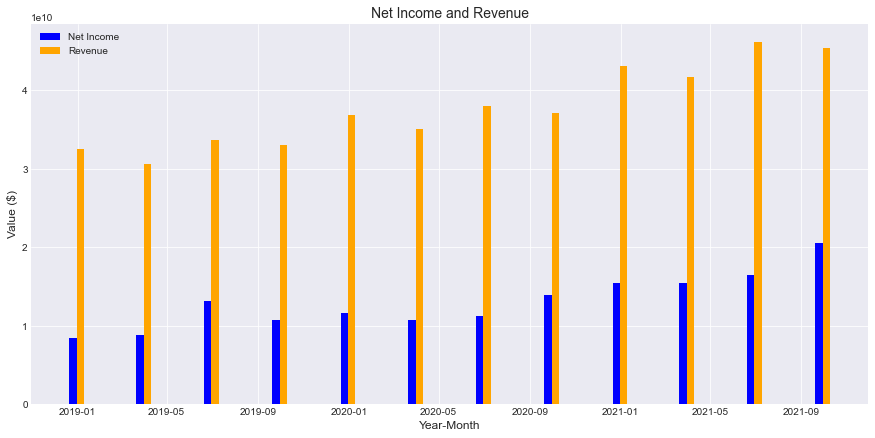

In [15]:
# Plot the net income and revenue for the last 3 years
data_to_plot = msft_income_data.tail(12)
data = [data_to_plot['Net Income'],
       data_to_plot['Revenue']]
X = data_to_plot.index
plt.figure(figsize=(15, 7))

# Plot the bar chart
plt.bar(X + timedelta(-5), data[0], color = 'b', width = 10, label="Net Income")
plt.bar(X + timedelta(5), data[1], color = 'orange', width = 10, label="Revenue")

# Set title and labels for the plot
plt.title('Net Income and Revenue', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Value ($)', fontsize=12)
plt.legend()
plt.show()

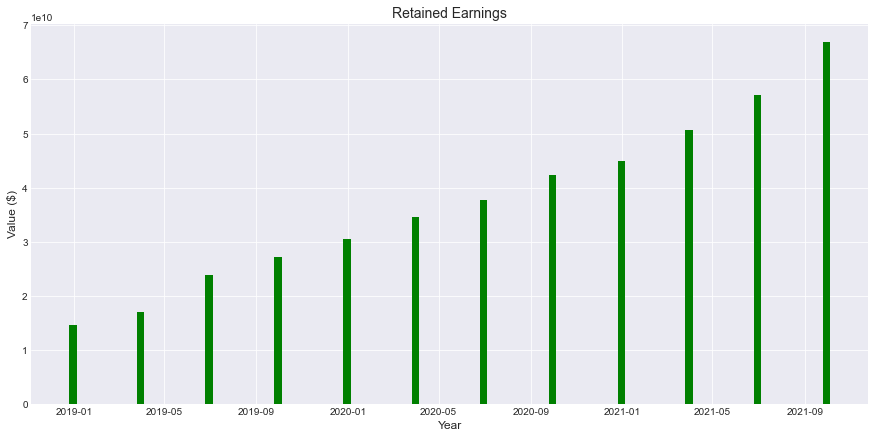

In [16]:
# Plot the retained earnings for the last 3 years
data_to_plot = msft_balance_sheet_data.tail(12)
data = [data_to_plot['Retained Earnings']]
X = data_to_plot.index
plt.figure(figsize=(15, 7))

# Plot the bar chart
plt.bar(X, data[0], color = 'green', width = 10, label="Operating Activities")

# Set title and labels for the plot
plt.title('Retained Earnings', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value ($)', fontsize=12)
plt.show()

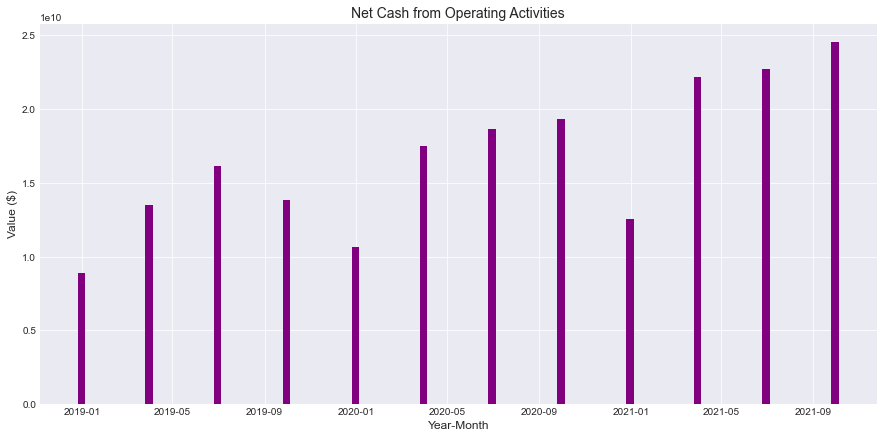

In [17]:
# Plot the cashflow data for the last 3 years
data_to_plot = msft_cash_flow_data.tail(12)
data = [data_to_plot['Net Cash from Operating Activities']]
X = data_to_plot.index
plt.figure(figsize=(15, 7))

# Plot the bar chart
plt.bar(X, data[0], color = 'purple', width = 10, label="Operating Activities")

# Set title and labels for the plot
plt.title('Net Cash from Operating Activities', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Value ($)', fontsize=12)
plt.show()

In the upcoming notebook, you will learn to calculate various financial ratios.
<br><br>